<a href="https://colab.research.google.com/github/ovozzx/Pre-processing/blob/main/%EC%84%9C%EC%9A%B8%EB%8C%80%EA%B3%B5%EC%9B%90_%EC%9E%85%EC%9E%A5%EA%B0%9D%EC%88%98_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Data Load


In [ ]:
!apt-get update
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import datetime as dt
import seaborn as sns
from scipy import stats


mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

plt.rcParams['font.size'] = 10

import warnings
warnings.filterwarnings('ignore')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
df = pd.read_excel('0_2.서울대공원_통합(211012).xlsx')
#df.info()

# 1. Data Preprocessing


* 'year', 'month', 'day' 추출

In [ ]:
df.tail(3)

,날짜,요일,행사/축제기간,평일/주말,공휴일,대체공휴일,"샌드위치휴무(화,목)",유료입장객,무료입장객,총합계,외국인입장객,"동,식물원1","동,식물원2","동,식물원3","동,식물원4","동,식물원5","동,식물원6","동,식물원7","동,식물원8",돌고래쇼1,돌고래쇼2,돌고래쇼3,돌고래쇼4,돌고래쇼5,돌고래쇼6,돌고래쇼7,돌고래쇼8,테마가든1,테마가든2,테마가든3,테마가든4,테마가든5,테마가든6,테마가든7,테마가든8,캠프입장1,캠프입장2,캠프입장3,캠프입장4,캠프입장5,캠프입장6,캠프입장7,캠프입장8,자연학습1,자연학습2,자연학습3,자연학습4,자연학습5,자연학습6,자연학습7,자연학습8,기타1,기타2,기타3,기타4,기타5,기타6,기타7,기타8,계절,강수량(mm),평균기온(℃),최고기온(℃),최저기온(℃),일교차,평균풍속(m/s),최대풍속(m/s),평균습도(%rh),최저습도(%rh),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),황사,폭염일수,일 최심적설(cm),메르스 유행 여부,AI로 인한 동물원 휴원여부,벚꽃
3613,2020-04-28,2,0,0,0,0,0,1862,1118,2980,218,1766,1564,19,183,209,0,943,2709,0,0,0,0,0,0,0,0,96,82,3,11,9,0,175,271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,13.9,19.9,7.8,12.1,3.0,5.5,50.0,26.0,39,24,0,0,0.0,0,0,0
3614,2020-04-29,3,0,0,0,0,0,3271,985,4256,218,3186,2642,71,473,209,1404,814,4000,0,0,0,0,0,0,0,0,85,79,1,5,9,0,171,256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,14.9,21.0,9.3,11.7,2.6,5.2,48.6,25.0,53,35,0,0,0.0,0,0,0
3615,2020-04-30,4,0,0,1,0,1,13003,3595,16598,218,12374,10501,276,1597,209,0,3319,15693,0,0,0,0,0,0,0,0,629,544,14,71,9,0,276,905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,17.1,23.4,9.3,14.1,2.7,5.9,57.1,41.0,36,22,0,0,0.0,0,0,0


In [ ]:
year_data = []
month_data = []
day_data = []

for i in range(0,3616):
    year_data.append(df['날짜'].dt.year[i])
    month_data.append(df['날짜'].dt.month[i])
    day_data.append(df['날짜'].dt.day[i])

In [ ]:
df['year'] = year_data
df['month'] = month_data
df['day'] = day_data


- Drop Columns ('날짜' 제거)

In [ ]:
drop_columns = ['날짜']
df.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
child =  df['동,식물원4']+df['돌고래쇼4']+df['테마가든4']+df['캠프입장4']+df['자연학습4']+df['기타4']
df['어린이'] = child

In [ ]:
df.head(5)

,요일,행사/축제기간,평일/주말,공휴일,대체공휴일,"샌드위치휴무(화,목)",유료입장객,무료입장객,총합계,외국인입장객,"동,식물원1","동,식물원2","동,식물원3","동,식물원4","동,식물원5","동,식물원6","동,식물원7","동,식물원8",돌고래쇼1,돌고래쇼2,돌고래쇼3,돌고래쇼4,돌고래쇼5,돌고래쇼6,돌고래쇼7,돌고래쇼8,테마가든1,테마가든2,테마가든3,테마가든4,테마가든5,테마가든6,테마가든7,테마가든8,캠프입장1,캠프입장2,캠프입장3,캠프입장4,캠프입장5,캠프입장6,캠프입장7,캠프입장8,자연학습1,자연학습2,자연학습3,자연학습4,자연학습5,자연학습6,자연학습7,자연학습8,기타1,기타2,기타3,기타4,기타5,기타6,기타7,기타8,계절,강수량(mm),평균기온(℃),최고기온(℃),최저기온(℃),일교차,평균풍속(m/s),최대풍속(m/s),평균습도(%rh),최저습도(%rh),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),황사,폭염일수,일 최심적설(cm),메르스 유행 여부,AI로 인한 동물원 휴원여부,벚꽃,year,month,day,어린이
0,5,0,0,1,0,0,5110,452,5562,4,4063,2893,149,1021,0,2010,411,4474,748,505,44,199,4,0,41,789,299,251,10,38,0,0,0,299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-7.6,-3.6,-12.7,9.1,1.9,3.4,48.0,30.0,32,0,0,0,2.2,0,0,0,2010,1,1,1258
1,6,0,1,0,0,0,3790,1051,4841,0,2530,1880,148,502,0,0,1000,3530,772,557,22,193,0,0,49,821,488,389,16,83,0,0,2,490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,-3.6,0.2,-7.4,7.6,2.8,5.0,76.4,57.0,55,0,0,0,3.5,0,0,0,2010,1,2,778
2,0,0,1,0,0,0,3715,1087,4802,18,2425,1856,134,435,4,110,1025,3450,859,617,31,211,14,0,60,919,431,350,12,69,0,0,2,433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-6.8,-3.2,-10.5,7.3,2.2,5.1,49.3,32.0,49,0,0,0,3.2,0,0,0,2010,1,3,715
3,1,0,0,0,0,0,193,278,471,0,178,165,11,2,0,70,274,452,5,5,0,0,0,0,2,7,10,10,0,0,0,0,2,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.2,-5.9,-3.4,-8.0,4.6,3.0,4.9,84.1,51.0,37,0,0,0,28.5,0,0,0,2010,1,4,2
4,2,0,0,0,0,0,3779,431,4210,2,3742,1927,19,1796,0,3560,425,4167,12,11,0,1,2,0,2,14,25,25,0,0,0,0,4,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-9.9,-7.0,-12.3,5.3,2.9,4.8,66.4,48.0,51,0,0,0,25.6,0,0,0,2010,1,5,1797


#2. 탐색적 데이터 분석(EDA)

## * 날씨 → 서울대공원 입장객수
---



연도마다 월별 유사 패턴을 가지고 있음


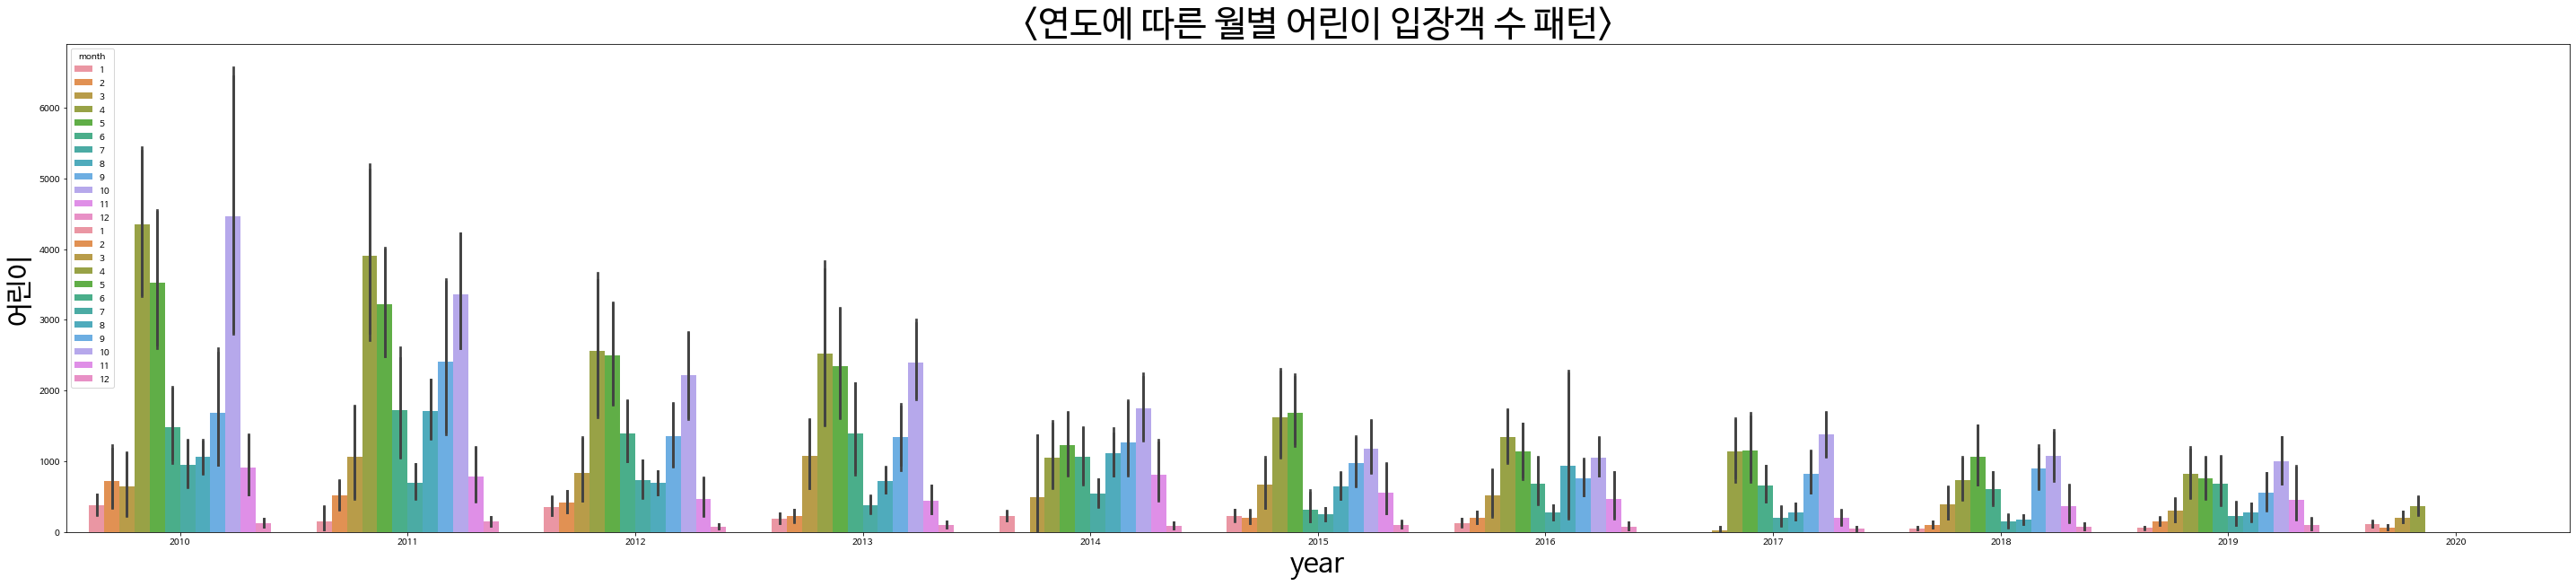

In [ ]:
plt.figure(figsize = (50,10))

plt.xlabel('연도', fontsize = 30)
plt.ylabel('어린이', fontsize = 30)
plt.title('<연도에 따른 월별 어린이 입장객 수 패턴>',fontsize = 40)

sns.barplot(x = 'year', 
            y = '어린이', 
            data = df,
            hue = 'month')

sns.barplot(x = 'year', 
                y = '어린이', 
                data = df,
                hue = 'month')


print('연도마다 월별 유사 패턴을 가지고 있음')

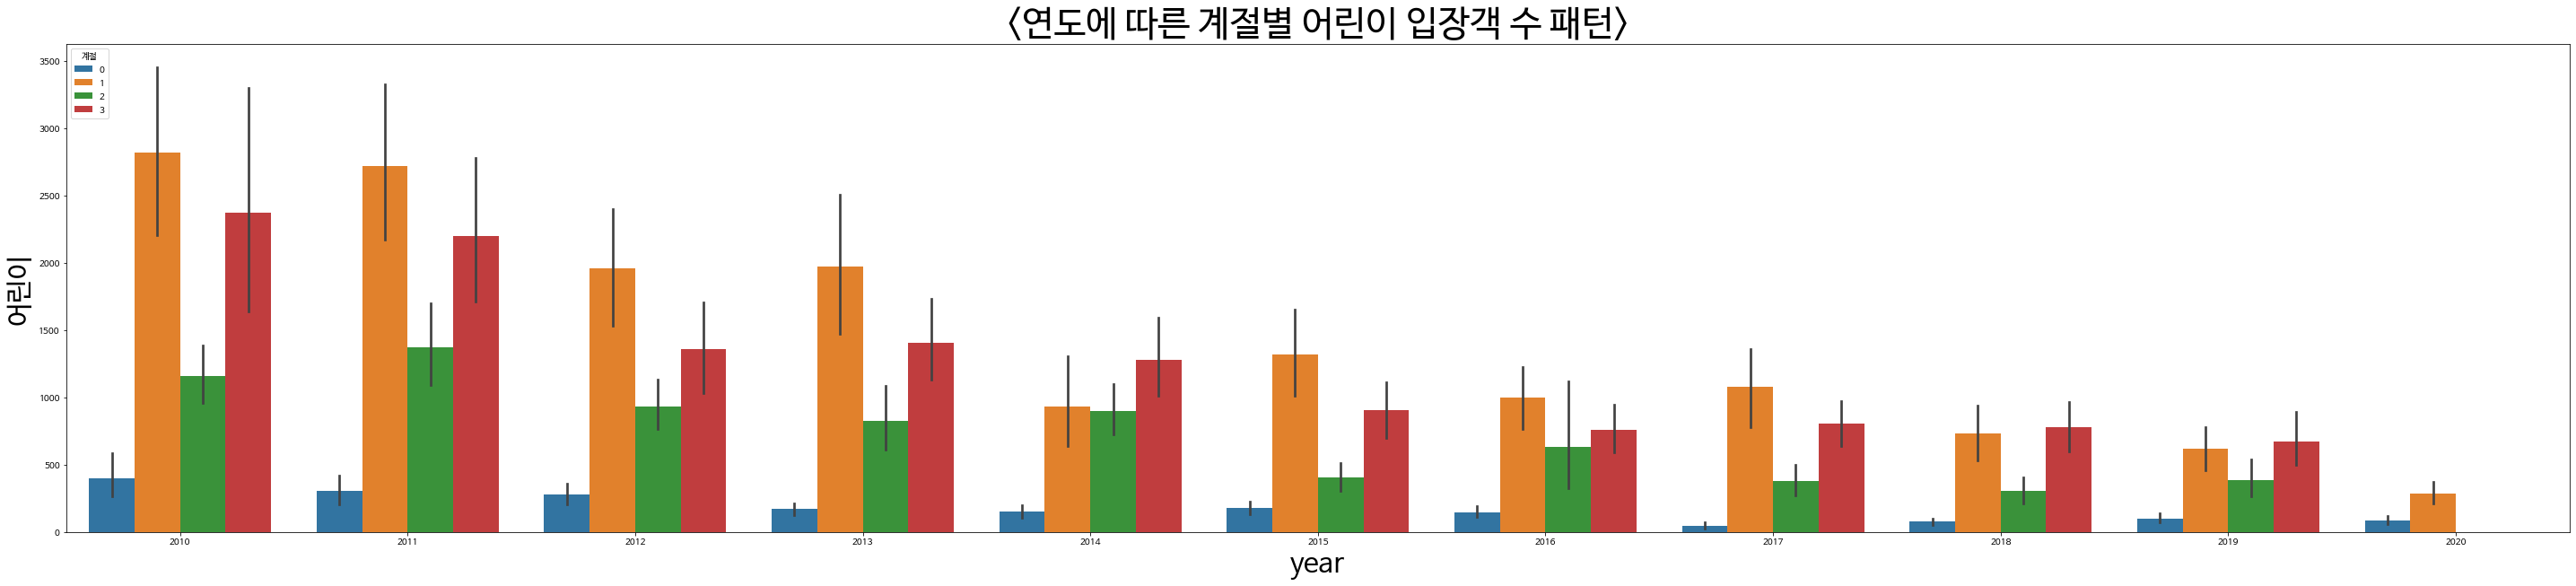

In [ ]:
plt.figure(figsize = (50,10))
plt.xlabel('연도', fontsize = 30)
plt.ylabel('어린이', fontsize = 30)
plt.title('<연도에 따른 계절별 어린이 입장객 수 패턴>',fontsize = 40)

sns.barplot(x = 'year', 
            y = '어린이', 
            data = df,
            hue = '계절')


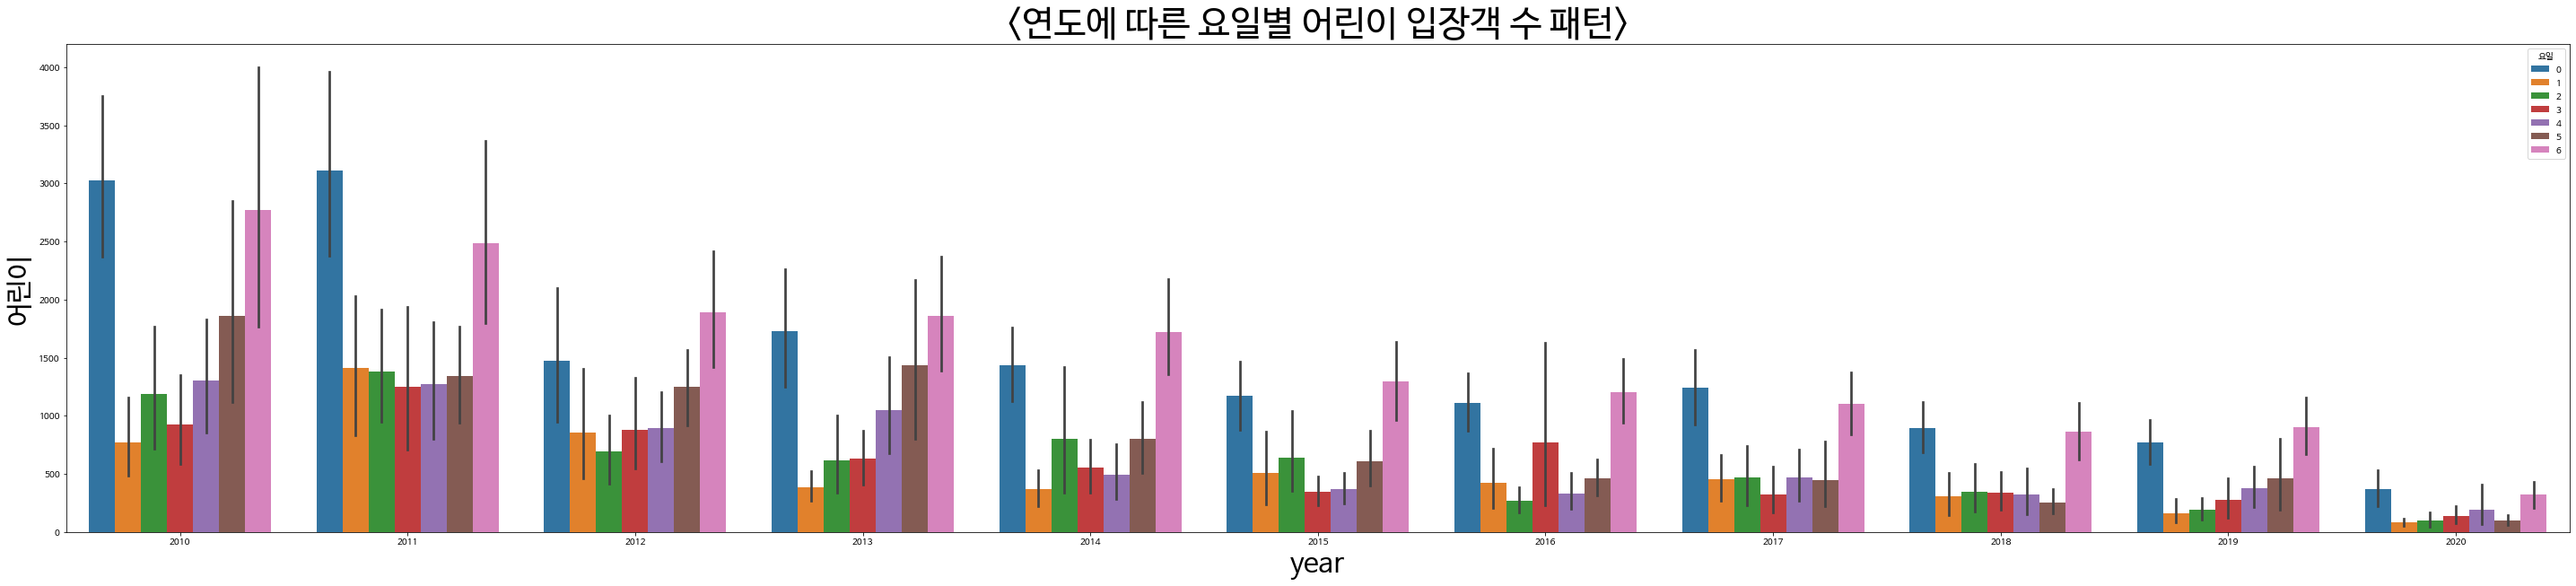

In [ ]:
plt.figure(figsize = (50,10))
plt.xlabel('연도', fontsize = 30)
plt.ylabel('어린이', fontsize = 30)
plt.title('<연도에 따른 요일별 어린이 입장객 수 패턴>',fontsize = 40)

sns.barplot(x = 'year', 
            y = '어린이', 
            data = df,
            hue = '요일')


### 1) 강수량

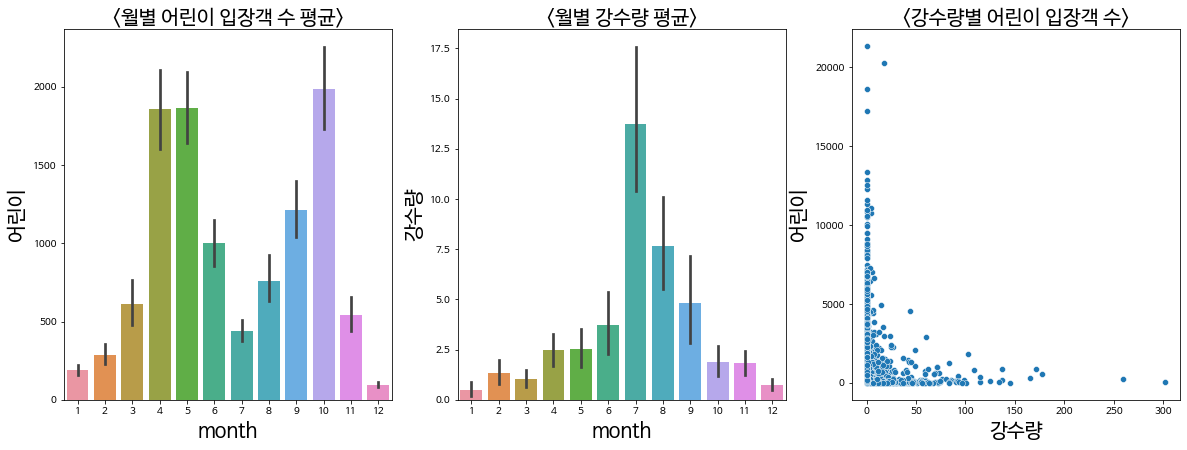

In [ ]:

#입장객 수
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
plt.title('<월별 어린이 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'month', 
            y = '어린이', 
            data = df)
plt.xlabel('month', fontsize = 20)
plt.ylabel('어린이', fontsize = 20)


#강수량
plt.subplot(2,3,2)
plt.title('<월별 강수량 평균>',fontsize = 20)
sns.barplot(x = 'month', 
            y = '강수량(mm)', 
            data = df)
plt.xlabel('month', fontsize = 20)
plt.ylabel('강수량', fontsize = 20)


plt.subplot(2,3,3)
plt.title('<강수량별 어린이 입장객 수>',fontsize = 20)
sns.scatterplot(x = '강수량(mm)', 
                y = '어린이', 
                data = df)
plt.xlabel('강수량', fontsize = 20)
plt.ylabel('어린이', fontsize = 20)


plt.show()       


### 2) 평균기온

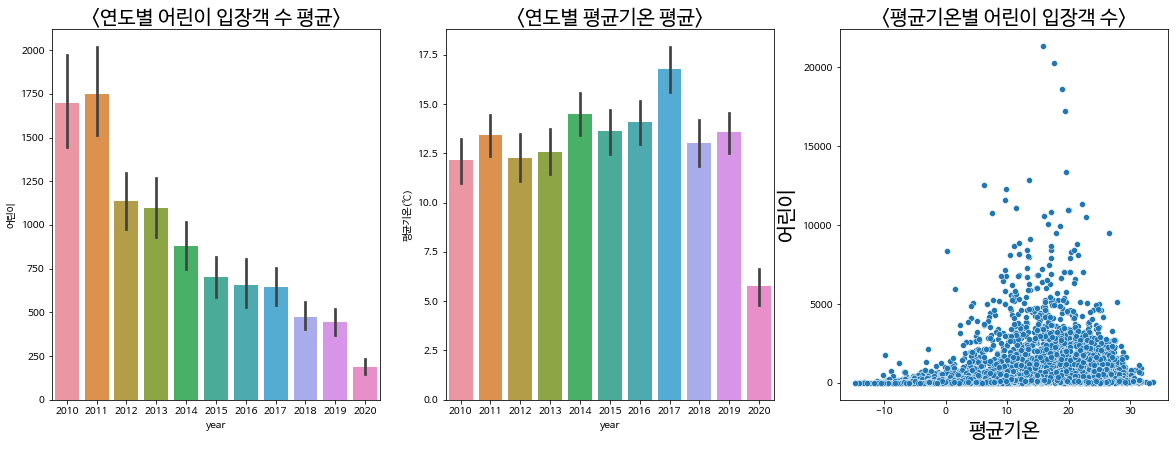

In [ ]:
#입장객 수
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
plt.title('<연도별 어린이 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '어린이', 
            data = df)


#평균기온 
plt.subplot(2,3,2)
plt.title('<연도별 평균기온 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '평균기온(℃)', 
            data = df)

plt.subplot(2,3,3)
plt.title('<평균기온별 어린이 입장객 수>',fontsize = 20)
sns.scatterplot(x = '평균기온(℃)', 
                y = '어린이', 
                data = df)
plt.xlabel('평균기온', fontsize = 20)
plt.ylabel('어린이', fontsize = 20)


plt.show()
#print('10 ~ 23℃에 많이 분포') 

### 3) 평균풍속

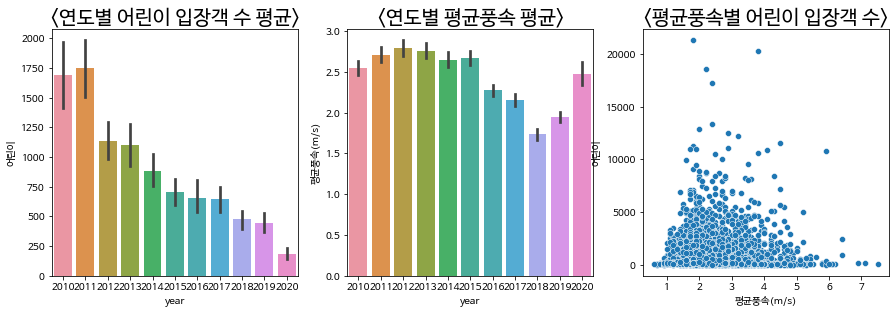

In [ ]:
#입장객 수
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
plt.title('<연도별 어린이 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '어린이', 
            data = df)

#평균풍속
plt.subplot(2,3,2)
plt.title('<연도별 평균풍속 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '평균풍속(m/s)', 
            data = df)

plt.subplot(2,3,3)
plt.title('<평균풍속별 어린이 입장객 수>',fontsize = 20)
sns.scatterplot(x = '평균풍속(m/s)', 
            y = '어린이', 
            data = df)

plt.show()       


### 4) 평균습도

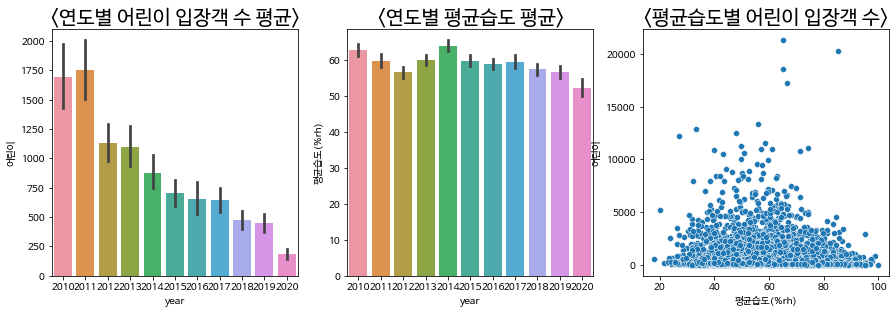

In [ ]:
#입장객 수
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
plt.title('<연도별 어린이 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '어린이', 
            data = df)

#평균습도
plt.subplot(2,3,2)
plt.title('<연도별 평균습도 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '평균습도(%rh)', 
            data = df)

plt.subplot(2,3,3)
plt.title('<평균습도별 어린이 입장객 수>',fontsize = 20)
sns.scatterplot(x = '평균습도(%rh)', 
            y = '어린이', 
            data = df)

plt.show()       

### 5) 일교차



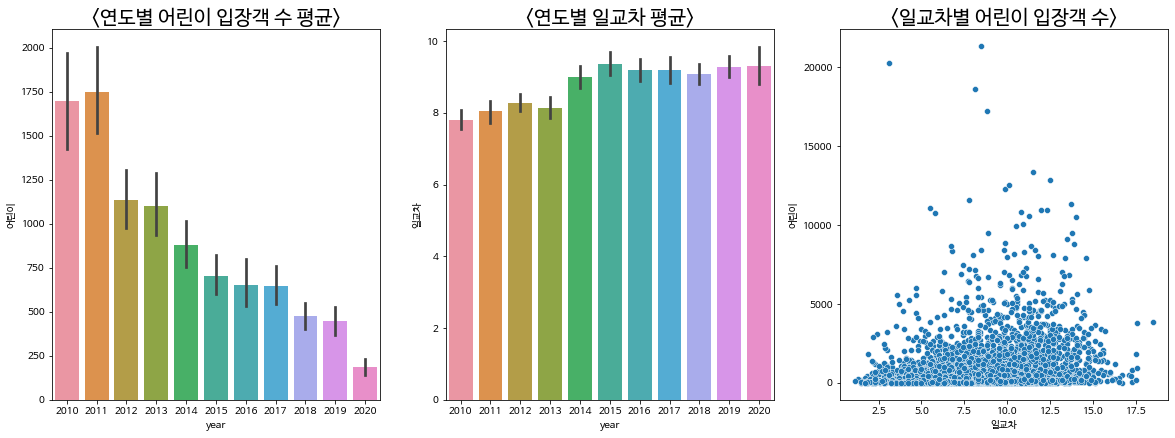

In [ ]:
#입장객 수
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
plt.title('<연도별 어린이 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '어린이', 
            data = df)

#일교차
plt.subplot(2,3,2)
plt.title('<연도별 일교차 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '일교차', 
            data = df)

plt.subplot(2,3,3)
plt.title('<일교차별 어린이 입장객 수>',fontsize = 20)
sns.scatterplot(x = '일교차', 
            y = '어린이', 
            data = df)

plt.show()       

## * 계절 → 서울대공원 입장객수

 12, 1, 2 : 겨울 -> 0

 3, 4, 5 : 봄 -> 1

 6, 7, 8 : 여름 -> 2

 9, 10, 11 : 가을  ->  3


> 위키백과
---





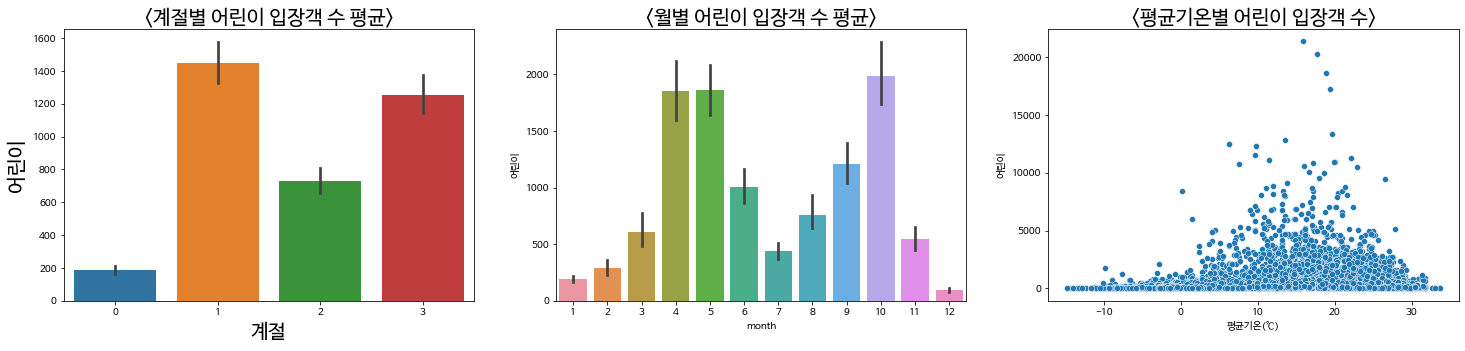

In [ ]:
# 0 : 겨울
# 1 : 봄
# 2 : 여름
# 3 : 가을 

plt.figure(figsize = (25,5))
plt.subplot(1,3,1)
sns.barplot(x = '계절', 
            y = '어린이', 
            data = df)
plt.title('<계절별 어린이 입장객 수 평균>',fontsize = 20)
plt.xlabel(xlabel= '계절', fontsize = 20)
plt.ylabel(ylabel= '어린이', fontsize = 20)

plt.subplot(1,3,2)
#봄은 3,4,5 월
sns.barplot(x = 'month', 
            y = '어린이', 
            data = df)
plt.title('<월별 어린이 입장객 수 평균>',fontsize = 20)



plt.subplot(1,3,3)
plt.title('<평균기온별 어린이 입장객 수>',fontsize = 20)
sns.scatterplot(x = '평균기온(℃)', 
                y = '어린이', 
                data = df)

plt.show()



## * 대기상태 → 서울대공원 입장객수
---

### 1) 황사주의보

In [ ]:
# 10년간 봄(3월,4월,5월)에서 황사주의보 빈도에 따른 영향

count3 = 0
count4 = 0
count5 = 0


for i in range(0,3616):
  if (df.loc[i]['month'] == 3) and (df.loc[i]['황사']==1):
    count3 += 1

for i in range(0,3616):
  if (df.loc[i]['month'] == 4) and (df.loc[i]['황사']==1):
    count4 += 1

for i in range(0,3616):
  if (df.loc[i]['month'] == 5) and (df.loc[i]['황사']==1):
    count5 += 1


print('3월 황사주의보 빈도:',count3, '4월 황사주의보 빈도',count4,'5월 황사주의보 빈도' ,count5 )


3월 황사주의보 빈도: 22 4월 황사주의보 빈도 11 5월 황사주의보 빈도 18


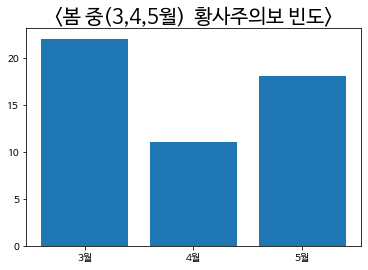

In [ ]:
x = ['3월','4월','5월']
y = [count3, count4, count5]

plt.bar(x,y)
plt.title('<봄 중(3,4,5월)  황사주의보 빈도>',fontsize = 20)
plt.show()

### 2) 미세먼지

미세먼지와 어린이 상관계수 :  0.01761543615519065
강수량과 어린이 상관계수 :  -0.07070563484359997
강수량과 미세먼지 상관계수 :  -0.18335321887348352


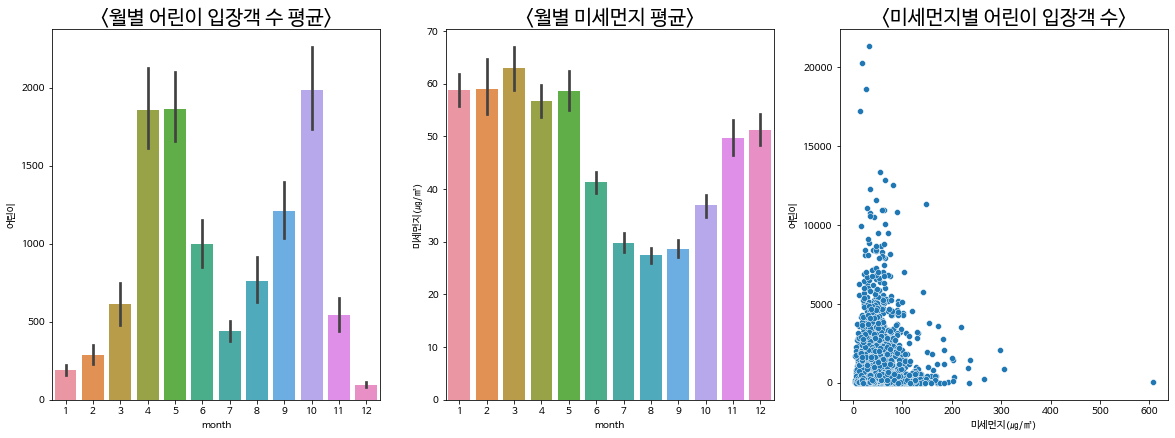

In [ ]:
#어린이 입장객 수
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
plt.title('<월별 어린이 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'month', 
            y = '어린이', 
            data = df)

#미세먼지
plt.subplot(2,3,2)
plt.title('<월별 미세먼지 평균>',fontsize = 20)
sns.barplot(x = 'month', 
            y = '미세먼지(㎍/㎥)', 
            data = df)

plt.subplot(2,3,3)
plt.title('<미세먼지별 어린이 입장객 수>',fontsize = 20)
sns.scatterplot(x = '미세먼지(㎍/㎥)', 
            y = '어린이', 
            data = df)

#plt.xlim(0, 140)
print('미세먼지와 어린이 상관계수 : ', stats.pearsonr(df['미세먼지(㎍/㎥)'], df['어린이'] )[0])
print('강수량과 어린이 상관계수 : ', stats.pearsonr(df['강수량(mm)'], df['어린이'] )[0])
print('강수량과 미세먼지 상관계수 : ', stats.pearsonr(df['강수량(mm)'], df['미세먼지(㎍/㎥)'] )[0])

plt.show()       

### 3) 초미세먼지

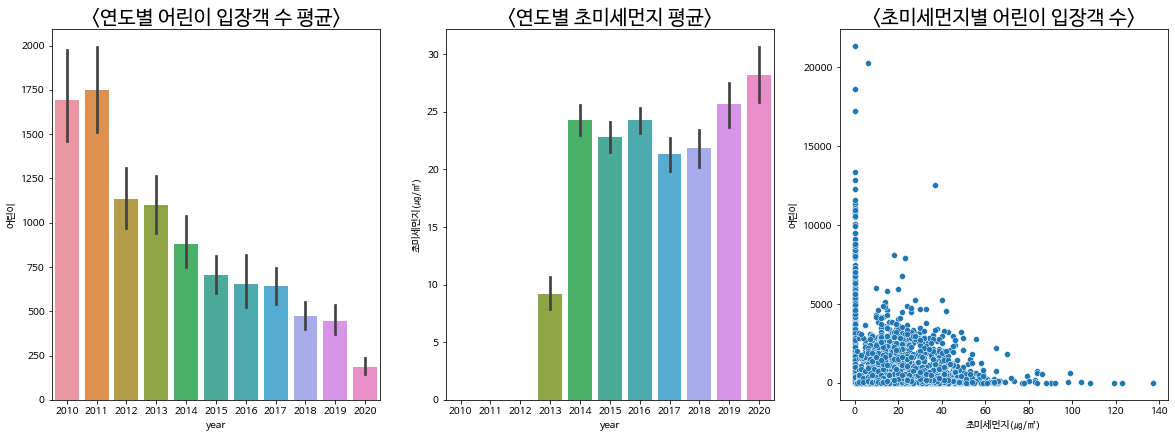

In [ ]:
#어린이 입장객 수
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
plt.title('<연도별 어린이 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '어린이', 
            data = df)

#미세먼지
plt.subplot(2,3,2)
plt.title('<연도별 초미세먼지 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '초미세먼지(㎍/㎥)', 
            data = df)

plt.subplot(2,3,3)
plt.title('<초미세먼지별 어린이 입장객 수>',fontsize = 20)
sns.scatterplot(x = '초미세먼지(㎍/㎥)', 
            y = '어린이', 
            data = df)

plt.show()       


- **피어슨 상관계수**

 두 변수 간에 선형성(linearity)이 얼마나 강한지를 측정

 1) 강수량 & 미세먼지

 2) 적설량 & 미세먼지
 
 3) 황사주의보 유무 & 미세먼지 & 초미세먼지

 4) 평균습도 & 미세먼지



강수량과 미세먼지 상관계수 :  -0.18335321887348352
강수량과 초미세먼지 상관계수 :  -0.12417128053647841


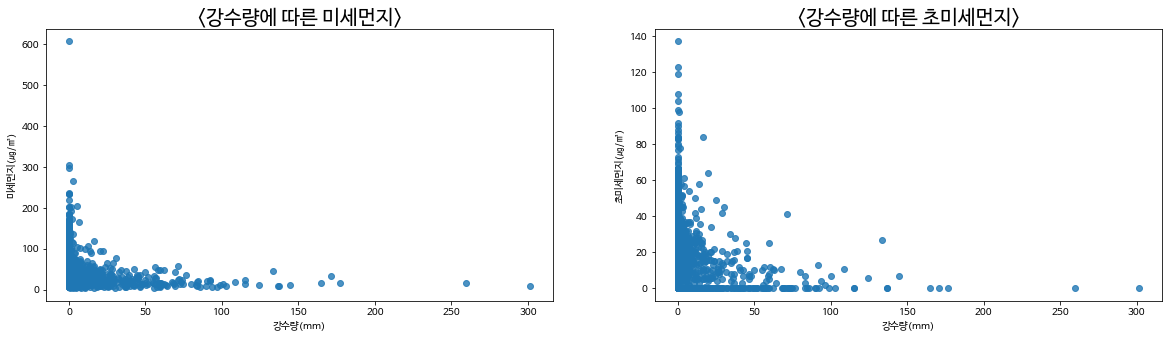

In [ ]:
#강수량과 미세먼지
print('강수량과 미세먼지 상관계수 : ', stats.pearsonr(df['강수량(mm)'], df['미세먼지(㎍/㎥)'] )[0])
fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.regplot(x = '강수량(mm)', y = '미세먼지(㎍/㎥)', data = df, fit_reg = False)
plt.title('<강수량에 따른 미세먼지>',fontsize = 20)


#강수량과 초미세먼지
print('강수량과 초미세먼지 상관계수 : ', stats.pearsonr(df['강수량(mm)'], df['초미세먼지(㎍/㎥)'] )[0])
plt.subplot(1,2,2)
sns.regplot(x = '강수량(mm)', y = '초미세먼지(㎍/㎥)', data = df, fit_reg = False)
plt.title('<강수량에 따른 초미세먼지>',fontsize = 20)
plt.show()


적설량과 미세먼지 상관계수 :  0.015147404634197694
적설량과 초미세먼지 상관계수 :  -0.1141093507757363


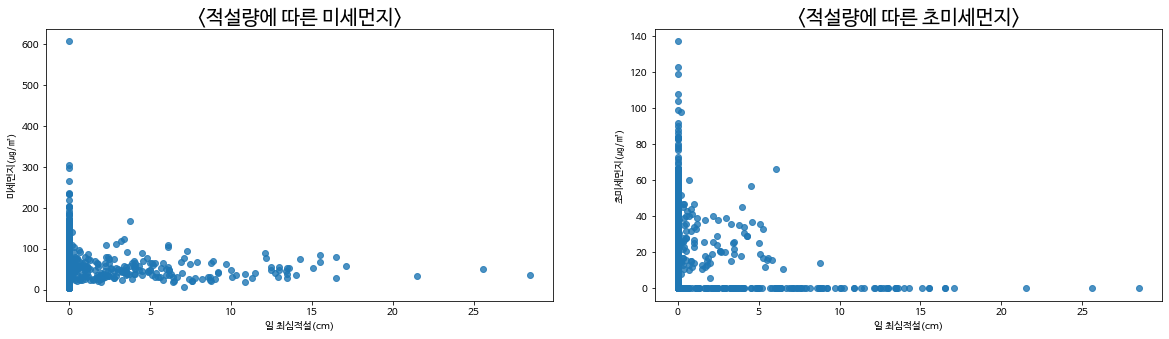

In [ ]:
#적설량과 미세먼지
print('적설량과 미세먼지 상관계수 : ', stats.pearsonr(df['일 최심적설(cm)'], df['미세먼지(㎍/㎥)'] )[0])
fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.regplot(x = '일 최심적설(cm)', y = '미세먼지(㎍/㎥)', data = df, fit_reg = False)
plt.title('<적설량에 따른 미세먼지>',fontsize = 20)



#적설량과 초미세먼지
print('적설량과 초미세먼지 상관계수 : ', stats.pearsonr(df['일 최심적설(cm)'], df['초미세먼지(㎍/㎥)'] )[0])
plt.subplot(1,2,2)
sns.regplot(x = '일 최심적설(cm)', y = '초미세먼지(㎍/㎥)', data = df, fit_reg = False)
plt.title('<적설량에 따른 초미세먼지>',fontsize = 20)
plt.show()


황사주의보 유무와 미세먼지 상관계수 :  0.42473821329669953
황사주의보 유무와 초미세먼지 상관계수 :  0.04423753672355005
미세먼지와 초미세먼지 상관계수 :  0.40716176346095434


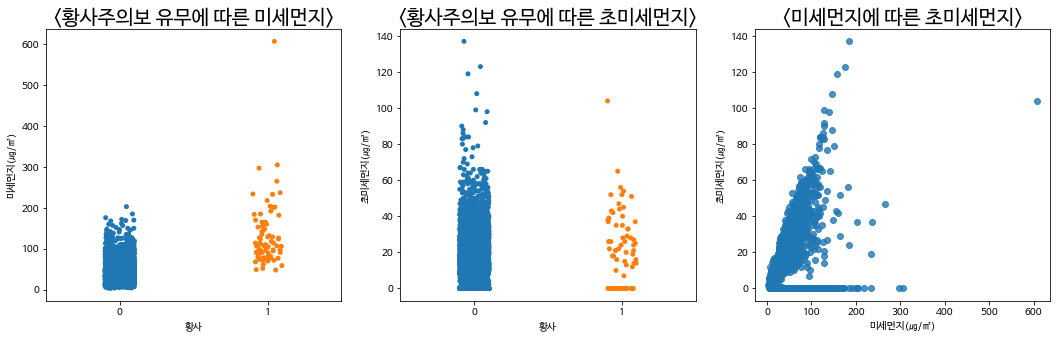

In [ ]:
#황사주의보 유무와 미세먼지
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
print('황사주의보 유무와 미세먼지 상관계수 : ', stats.pearsonr(df['황사'], df['미세먼지(㎍/㎥)'] )[0])
sns.stripplot(x = '황사', y = '미세먼지(㎍/㎥)', data = df, jitter = True)
plt.title('<황사주의보 유무에 따른 미세먼지>',fontsize = 20)


#황사주의보 유무와 초미세먼지
print('황사주의보 유무와 초미세먼지 상관계수 : ', stats.pearsonr(df['황사'], df['초미세먼지(㎍/㎥)'] )[0])
plt.subplot(1,3,2)
sns.stripplot(x = '황사', y = '초미세먼지(㎍/㎥)', data = df, jitter = True)
plt.title('<황사주의보 유무에 따른 초미세먼지>',fontsize = 20)


#미세먼지와 초미세먼지
print('미세먼지와 초미세먼지 상관계수 : ', stats.pearsonr(df['미세먼지(㎍/㎥)'], df['초미세먼지(㎍/㎥)'] )[0])
plt.subplot(1,3,3)
sns.regplot(x = '미세먼지(㎍/㎥)', y = '초미세먼지(㎍/㎥)', data = df, fit_reg = False)
plt.title('<미세먼지에 따른 초미세먼지>',fontsize = 20)
plt.show()




평균습도와 미세먼지 상관계수 :  -0.16748435923796318
강수량과 평균습도 상관계수 :  0.4065361463614184


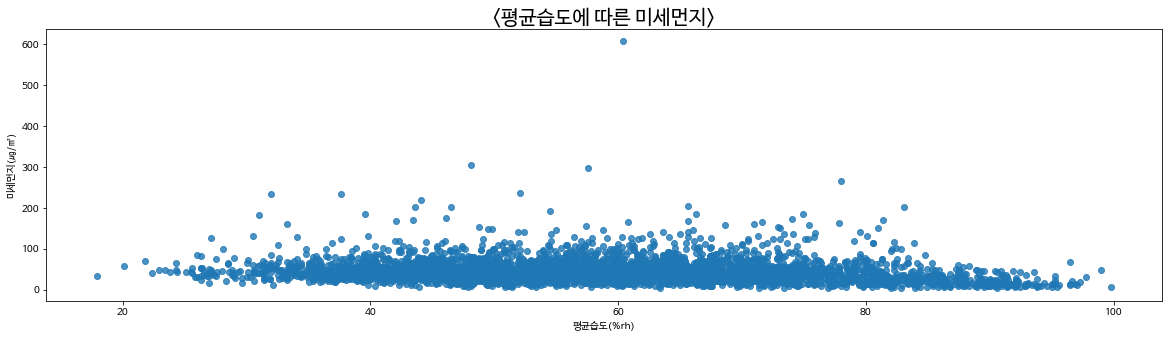

In [ ]:
#평균습도와 미세먼지
print('평균습도와 미세먼지 상관계수 : ', stats.pearsonr(df['평균습도(%rh)'], df['미세먼지(㎍/㎥)'] )[0])
print('강수량과 평균습도 상관계수 : ', stats.pearsonr(df['강수량(mm)'], df['평균습도(%rh)'] )[0])
fig = plt.figure(figsize = (20,5))
sns.regplot(x = '평균습도(%rh)', y = '미세먼지(㎍/㎥)', data = df, fit_reg = False)
plt.title('<평균습도에 따른 미세먼지>',fontsize = 20)
plt.show()


## * 폭염주의보 유무 → 서울대공원 입장객 수

> 폭염주의보 : 여름철에 하루 최고 기온이 33~35℃인 상태가 2일 이상 지속될 것으로 예상될 때에 발령




---

폭염일수
0    3490
1     126
dtype: int64


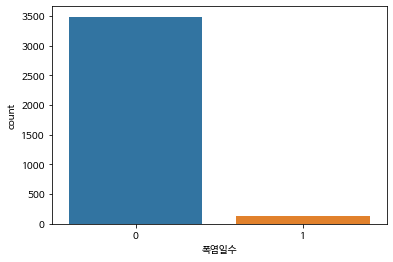

In [ ]:
print(df.value_counts('폭염일수'))
sns.countplot( x = '폭염일수', data = df)
#sns.countplot( x = '폭염일수', data = df, hue = 'year')

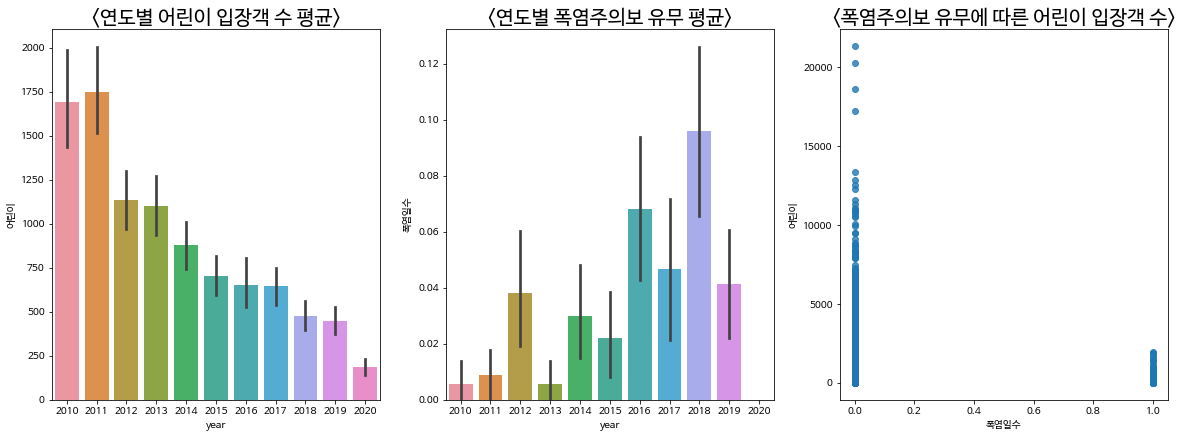

In [ ]:

#- 연도별
#입장객 수
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
plt.title('<연도별 어린이 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '어린이', 
            data = df)


#폭염주의보 유무
plt.subplot(2,3,2)
plt.title('<연도별 폭염주의보 유무 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '폭염일수', 
            data = df)


plt.subplot(2,3,3)
sns.regplot(x = '폭염일수', y = '어린이', data = df, fit_reg = False)
plt.title('<폭염주의보 유무에 따른 어린이 입장객 수>',fontsize = 20)

plt.show()       
# 카운트 해보기

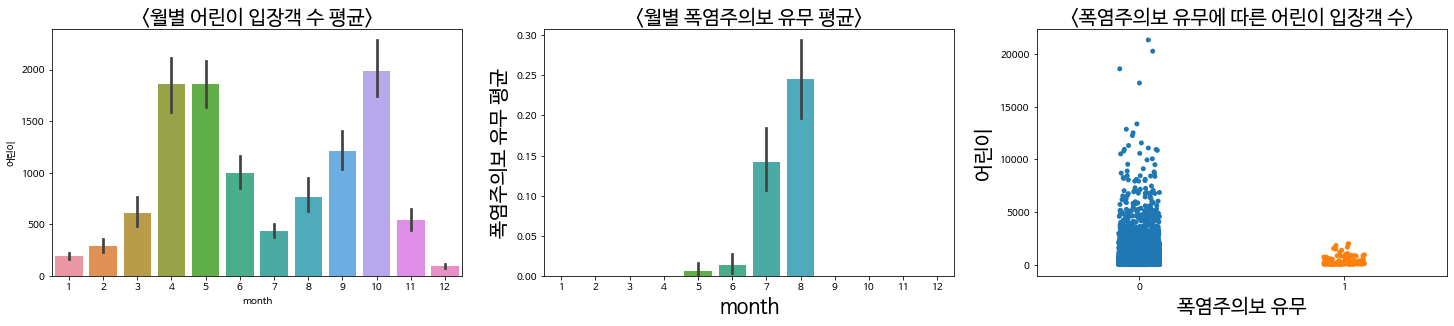

In [ ]:
#- 월별
#입장객 수
plt.figure(figsize = (25,10))
plt.subplot(2,3,1)
plt.title('<월별 어린이 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'month', 
            y = '어린이', 
            data = df)



#폭염일수
plt.subplot(2,3,2)
plt.title('<월별 폭염주의보 유무 평균>',fontsize = 20)
sns.barplot(x = 'month', 
            y = '폭염일수', 
            data = df)
plt.xlabel('month', fontsize = 20)
plt.ylabel('폭염주의보 유무 평균', fontsize = 20)



plt.subplot(2,3,3)
sns.stripplot(x = '폭염일수', y = '어린이', data = df, jitter = True)
plt.title('<폭염주의보 유무에 따른 어린이 입장객 수>',fontsize = 20)
plt.xlabel('폭염주의보 유무', fontsize = 20)
plt.ylabel('어린이', fontsize = 20)


plt.show()       
# 카운트 해보기

## * 벚꽃 개화 → 서울대공원 입장객 수

벚꽃 개화 O -> 1

벚꽃 개화 X -> 0






---

벚꽃
0    3509
1     107
dtype: int64


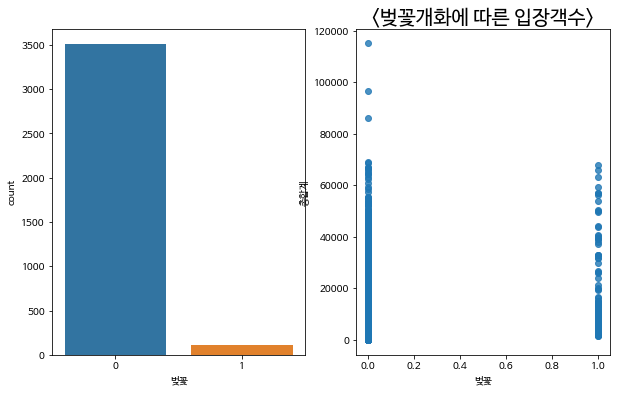

벚꽃 개화가 입장객수에 크게 영향을 주는 거 같지는 않음


In [ ]:
print(df.value_counts('벚꽃'))


plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(x = '벚꽃', data = df)

plt.subplot(1,2,2)
sns.regplot(x = '벚꽃', y = '총합계', data = df, fit_reg = False)
plt.title('<벚꽃개화에 따른 입장객수>',fontsize = 20)

plt.show()       
print('벚꽃 개화가 입장객수에 크게 영향을 주는 거 같지는 않음')

## * issue → 서울대공원 입장객 수
---

### 1) 2014년 4월 세월호 영향 (수학여행 금지)

3250201
왼쪽 그래프에서는 2013년도에 비해 입장객 수 평균값이 2014년에 감소함, 하지만 오른쪽 그래프에서는 2014년 4월 이후 증감이 반복됨


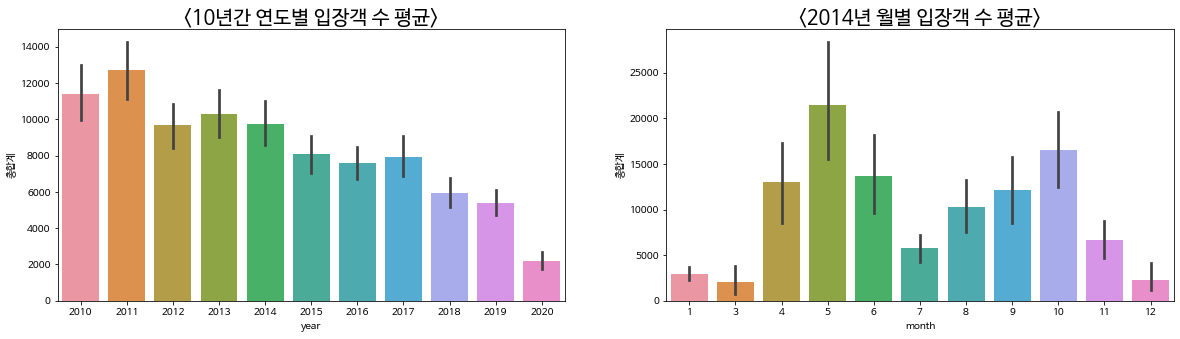

In [ ]:
#연도별 입장객 수 평균
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('<10년간 연도별 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '총합계', 
            data = df)    
data_2011 = df[365:706]
data_2012 = df[706:1072]
data_2013 = df[1072:1437]
data_2014 = df[1437:1770]
data_2015 = df[1770:2135]
data_2016 = df[2135:2487]

print(np.sum(data_2014['총합계']))

#2014년 월별 입장객 수 평균
plt.subplot(1,2,2)
plt.title('<2014년 월별 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'month', 
            y = '총합계', 
            data = data_2014)        

print('왼쪽 그래프에서는 2013년도에 비해 입장객 수 평균값이 2014년에 감소함, 하지만 오른쪽 그래프에서는 2014년 4월 이후 증감이 반복됨')

In [ ]:
#연도마다 시즌별(월별) 패턴, 경향이 있으니까 전년 동월 대비 비교해보자! 
#2013년 3월, 4월,5, 6월 / 2014년 3월, 4월,5월,6월 / 2015년 3월, 4월,5월,6월

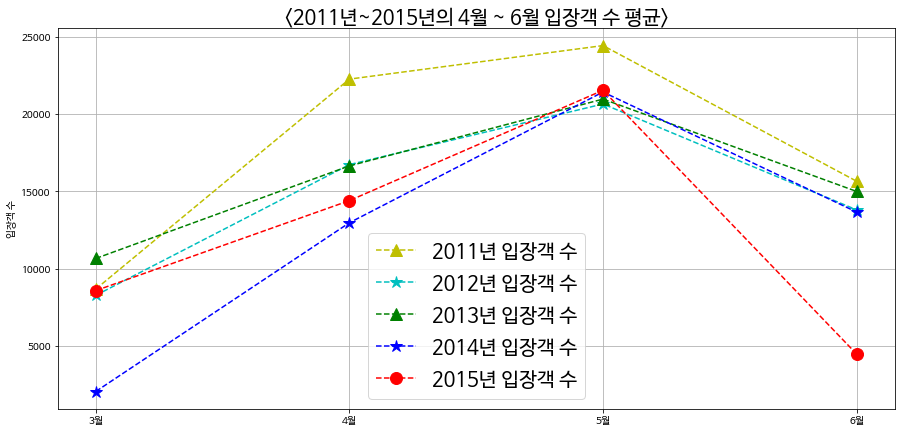

In [ ]:


x = ['3월', '4월', '5월', '6월']
y_2011 = [np.mean(data_2011[data_2011['month']==3].총합계), np.mean(data_2011[data_2011['month']==4].총합계),
          np.mean(data_2011[data_2011['month']==5].총합계), np.mean(data_2011[data_2011['month']==6].총합계)]

y_2012 = [np.mean(data_2012[data_2012['month']==3].총합계), np.mean(data_2012[data_2012['month']==4].총합계),
          np.mean(data_2012[data_2012['month']==5].총합계), np.mean(data_2012[data_2012['month']==6].총합계)]  

y_2013 = [np.mean(data_2013[data_2013['month']==3].총합계),np.mean(data_2013[data_2013['month']==4].총합계),
          np.mean(data_2013[data_2013['month']==5].총합계), np.mean(data_2013[data_2013['month']==6].총합계)]

y_2014 = [np.mean(data_2014[data_2014['month']==3].총합계), np.mean(data_2014[data_2014['month']==4].총합계),
          np.mean(data_2014[data_2014['month']==5].총합계), np.mean(data_2014[data_2014['month']==6].총합계)]

y_2015 = [np.mean(data_2015[data_2015['month']==3].총합계),np.mean(data_2015[data_2015['month']==4].총합계),
          np.mean(data_2015[data_2015['month']==5].총합계), np.mean(data_2015[data_2015['month']==6].총합계)]

plt.figure(figsize = (15,7))
plt.title('<2011년~2015년의 4월 ~ 6월 입장객 수 평균>',fontsize = 20)
plt.plot(x, y_2011,'y--^',label='2011년 입장객 수', markersize = 12)
plt.plot(x, y_2012,'c--*',label='2012년 입장객 수', markersize = 12)
plt.plot(x, y_2013,'g--^',label='2013년 입장객 수', markersize = 12)
plt.plot(x, y_2014,'b--*',label='2014년 입장객 수', markersize = 12)
plt.plot(x, y_2015,'r--o',label='2015년 입장객 수', markersize = 12)
plt.ylabel('입장객 수')
plt.legend(fontsize=20)
plt.grid()
plt.show()       


### 2) 메르스 여부

메르스 2015년 5월 20일에 첫 환자 발생
~ 2015년 12월 23일

연도별에서도 2015년 입장객 수 평균값 감소!, 2015년 월별에서도 입장객 수 평균 5월 이후 감소!


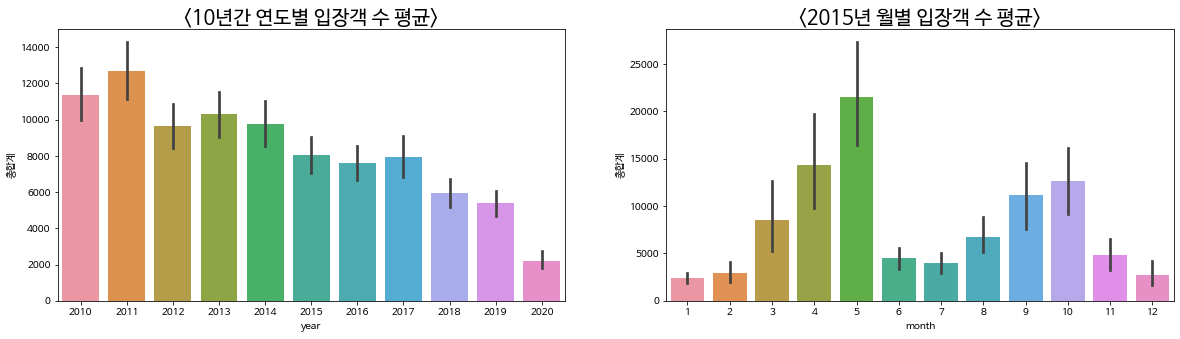

In [ ]:
#메르스 2015년 5월 20일 ~ 2015년 12월 23일
#2015년을 집중적으로 보자! 1770:2135

#연도별 입장객 수 평균
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('<10년간 연도별 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '총합계', 
            data = df)    


data_2015 = df[1770:2135]

#2015년 월별 입장객 수 평균
plt.subplot(1,2,2)
plt.title('<2015년 월별 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'month', 
            y = '총합계', 
            data = data_2015)        

print('연도별에서도 2015년 입장객 수 평균값 감소!, 2015년 월별에서도 입장객 수 평균 5월 이후 감소!')


5월 20일에 메르스 첫 환자가 발생했지만,20일 이후에 입장객 수 증가 추세


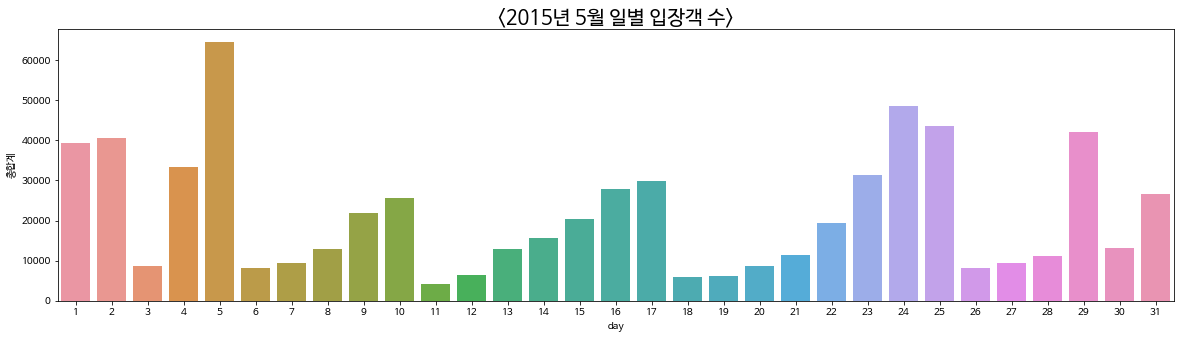

In [ ]:
#메르스 2015년 5월 20일 ~ 2015년 12월 23일
#2015년 5월도 집중적으로 분석 [1890:1921]

data_2015_may = df[1890:1921]
plt.figure(figsize = (20,5))
plt.title('<2015년 5월 일별 입장객 수>',fontsize = 20)
sns.barplot(x = 'day', 
            y = '총합계', 
            data = data_2015_may)    
            

print('5월 20일에 메르스 첫 환자가 발생했지만,20일 이후에 입장객 수 증가 추세')

### 3) 2016년 동물원 입장료 인상(2배)

입장료 인상 기사
https://www.yna.co.kr/view/AKR20151125172100004


서울대공원 입장료 인상안은 **2013년말** 동물원 사육사가 호랑이에 물려 숨지는 등 안전 및 동물보호 사고기 이어지면서 본격 제기됐다.

원문보기: 
https://www.hani.co.kr/arti/society/society_general/719503.html#csidx0437561e34e465885052d2dc3b1d832 

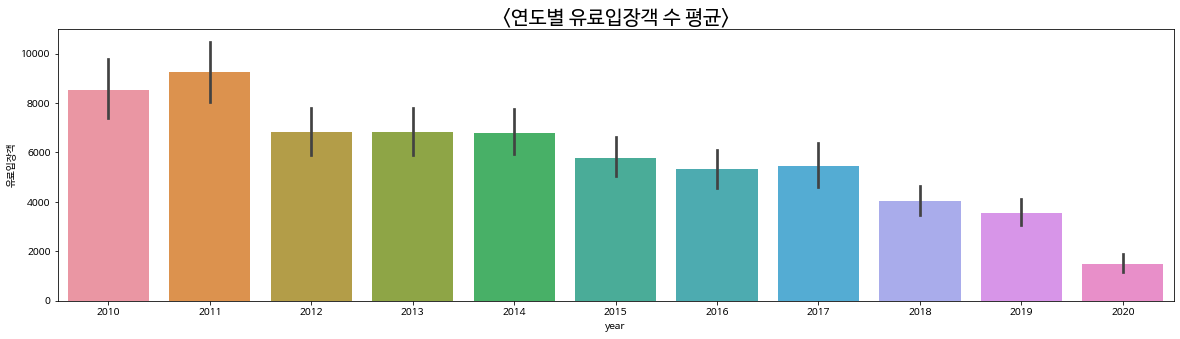

In [ ]:
#연도별 입장객 수 평균
plt.figure(figsize = (20,5))
plt.title('<연도별 유료입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'year', 
            y = '유료입장객', 
            data = df)    

### 4) 코로나

2019년 12월 중국 후베이성 우한시에서 처음 확인

 **2020년 1월**에 국제적 공중보건 비상사태를 선언하였고, 3월에는 펜데믹 즉 세계적 범유행으로 격상시켰다. 


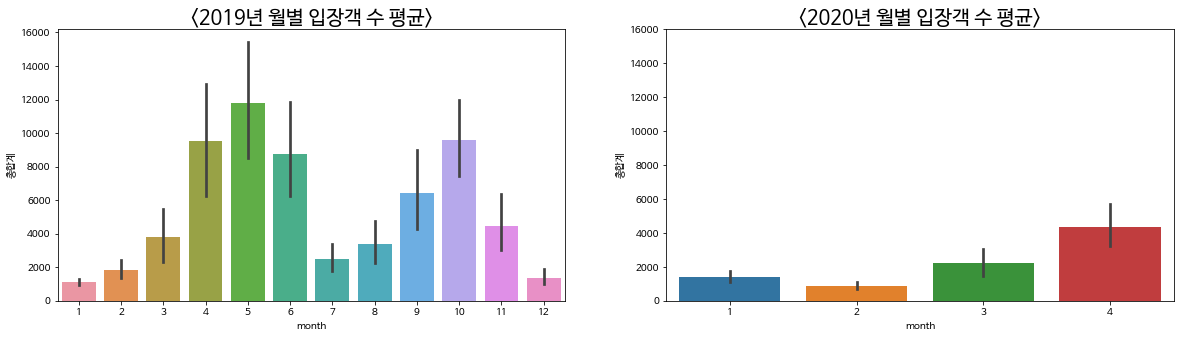

In [ ]:
#연도별 입장객 수 평균 -> 데이터가 2020년 4월까지만 있어서, 연도별로는 비교하기 어려움

#12.31

#2019년 월별 입장객 수 평균 
plt.figure(figsize = (20,5))
data_2019 = df[3131:3495]
plt.subplot(1,2,1)
plt.title('<2019년 월별 입장객 수 평균>',fontsize = 20)
sns.barplot(x = 'month', 
            y = '총합계', 
            data = data_2019)    


#2020년 월별 입장객 수 평균 
data_2020 = df[3495:]
plt.subplot(1,2,2)
plt.title('<2020년 월별 입장객 수 평균>',fontsize = 20)
plt.ylim(0,16000)
sns.barplot(x = 'month', 
            y = '총합계', 
            data = data_2020)  


## * 공휴일 → 서울대공원 입장객 수

일 월 화 수 목 금 토

0  1  2  3  4  5  6

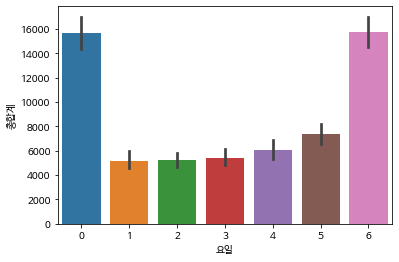

유료 이용객 수는 주말이 평일보다 3배정도 많다


In [ ]:
# 일요일~토요일 : 0, 1, 2, 3, 4, 5, 6
sns.barplot(x = '요일', 
            y = '총합계', 
            data = df)
plt.show()
print('유료 이용객 수는 주말이 평일보다 3배정도 많다')

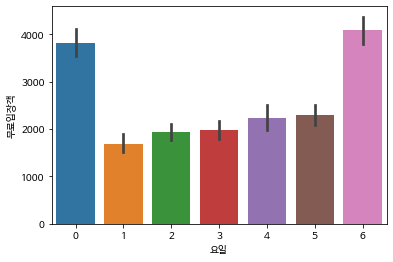

무료 이용객 수는 주말이 평일보다 2배정도 많다


In [ ]:
# 일요일~토요일 : 0, 1, 2, 3, 4, 5, 6
sns.barplot(x = '요일', 
            y = '무료입장객', 
            data = df)
plt.show()
print('무료 이용객 수는 주말이 평일보다 2배정도 많다')

-

In [ ]:
print(df.value_counts('행사/축제기간')/len(df) * 365)
print('연간 대략 154일 정도가 행사/축제가 있는 기간')

행사/축제기간
0    211.066095
1    153.933905
dtype: float64
연간 대략 154일 정도가 행사/축제가 있는 기간


In [ ]:
df.value_counts('샌드위치휴무(화,목)')

샌드위치휴무(화,목)
0    3575
1      41
dtype: int64

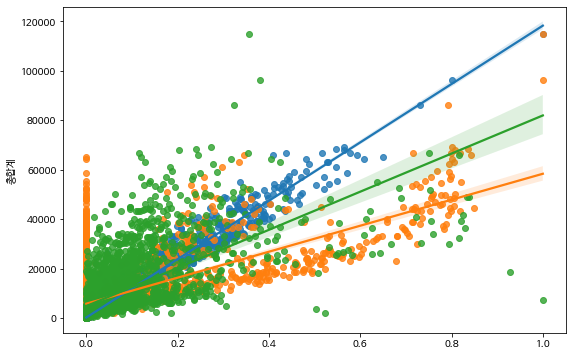

In [ ]:
# 1~8 순서는 차례대로 유료소계, 어른, 청소년, 어린이, 외국인, 단체입장, 무료소계, 총 계

from sklearn.preprocessing import MinMaxScaler
X1 = df[['동,식물원8']]
X2 = df[['돌고래쇼8']]
X3 = df[['테마가든8']]
y = df['총합계']



scaler1 = MinMaxScaler()
X1_Norm = scaler1.fit_transform(X1)
X2_Norm = scaler1.fit_transform(X2)
X3_Norm = scaler1.fit_transform(X3)
plt.figure(figsize=(9,6))
sns.regplot(x=X1_Norm, y=y)
sns.regplot(x=X2_Norm, y=y)
sns.regplot(x=X3_Norm, y=y)
plt.show()

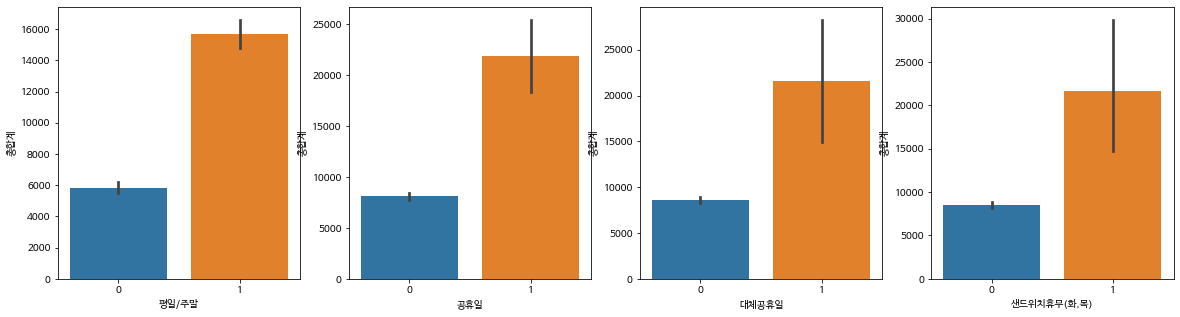

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.barplot(x = '평일/주말', 
            y = '총합계', 
            data = df)


plt.subplot(1,4,2)
sns.barplot(x = '공휴일', 
            y = '총합계', 
            data = df)


plt.subplot(1,4,3)
sns.barplot(x = '대체공휴일', 
            y = '총합계', 
            data = df)



plt.subplot(1,4,4)
sns.barplot(x = '샌드위치휴무(화,목)', 
            y = '총합계', 
            data = df)



plt.show()

# 쉬는날 / 안 쉬는날

휴일 유무와 전체 입장객수 상관계수 :  0.4707021280774537


Text(0.5, 1.0, '<휴일 유무에 따른 전체 입장객수>')

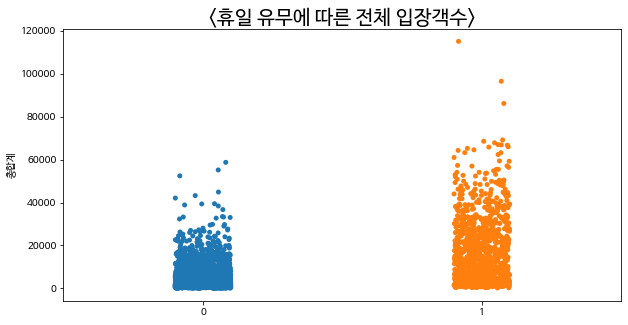

In [ ]:
#평일/휴일별 입장객수
#휴일 = 주말+공휴일+대체공휴일+샌드위치

data_holi = df['평일/주말']+df['공휴일']+df['대체공휴일']+df['샌드위치휴무(화,목)']

# 휴일 중복 제거 (2,3 값 제거)
for i in range(0,3616):
  if 1 < data_holi[i] :
    data_holi[i] = 1

plt.figure(figsize = (10,5))
print('휴일 유무와 전체 입장객수 상관계수 : ', stats.pearsonr(data_holi, df['총합계'] )[0])   

sns.stripplot(x = data_holi, y = '총합계', data = df, jitter = True)
plt.title('<휴일 유무에 따른 전체 입장객수>',fontsize = 20)



## * 입장객 유형별 → 서울대공원 입장객 수
----


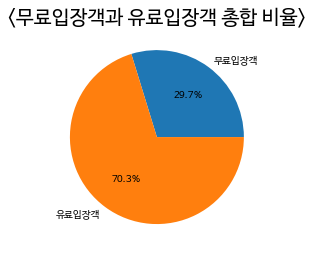

유료입장객이 훨씬 많다


In [ ]:
# 유료입장객/무료입장객/총합계/외국인입장객/돌고래쇼8/테마가든8/캠프입장8/자연학습8/기타8
# 2 = 어른, 3 = 청소년, 4 = 어린이

#10년간 총합에 대한 비율
ratio = [np.sum(df['무료입장객']),np.sum(df['유료입장객'])]
labels = ['무료입장객', '유료입장객']
plt.title('<무료입장객과 유료입장객 총합 비율>',fontsize = 20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()


print('유료입장객이 훨씬 많다')

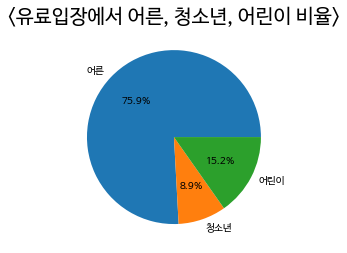

어른이 가장 많은 비중 차지


In [ ]:
# 동,식물원/돌고래쇼/테마가든/캠프입장/자연학습/기타
# 2 = 어른, 3 = 청소년, 4 = 어린이

#유료입장에서 어른, 청소년, 어린이 비율 (총합)

ad = df['동,식물원2']+df['돌고래쇼2']+df['테마가든2']+df['캠프입장2']+df['자연학습2']+df['기타2'] # 어른
st = df['동,식물원3']+df['돌고래쇼3']+df['테마가든3']+df['캠프입장3']+df['자연학습3']+df['기타3'] # 청소년
ch = df['동,식물원4']+df['돌고래쇼4']+df['테마가든4']+df['캠프입장4']+df['자연학습4']+df['기타4'] # 어린이


#10년간 총합에 대한 비율
ratio = [np.sum(ad), np.sum(st), np.sum(ch)]
labels = ['어른', '청소년', '어린이']
plt.title('<유료입장에서 어른, 청소년, 어린이 비율>',fontsize = 20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()


print('어른이 가장 많은 비중 차지')

In [ ]:
# 데이터 확인 필요
# 평일 -> 어른, 청소년, 어린이 
# 휴일 -> 어른, 청소년, 어린이 


holiday = [data_holi, ad, st, ch, df['유료입장객'], df['무료입장객'], df['총합계'], df['year']]


holiday = pd.DataFrame(holiday)
holiday.index = ['휴일유무', '어른', '청소년', '어린이', '유료입장객', '무료입장객', '총합계', '연도' ]
holiday = holiday.T

holiday

#print((df['age'] < 35) & ~(df['state'] == 'NY'))

,휴일유무,어른,청소년,어린이,유료입장객,무료입장객,총합계,연도
0,1,3649,203,1258,5110,452,5562,2010
1,1,2826,186,778,3790,1051,4841,2010
2,1,2823,177,715,3715,1087,4802,2010
3,0,180,11,2,193,278,471,2010
4,0,1963,19,1797,3779,431,4210,2010
...,...,...,...,...,...,...,...,...
3611,1,8630,195,1137,9962,2056,12018,2020
3612,0,1271,23,111,1405,863,2268,2020
3613,0,1646,22,194,1862,1118,2980,2020
3614,0,2721,72,478,3271,985,4256,2020


In [ ]:
ad_work = []
st_work = []
ch_work = []

ad_holi = []
st_holi = []
ch_holi = []


for i in range(0,3616):

  if holiday.loc[i]['휴일유무'] == 0 :
    
    ad_work.append(holiday.loc[i]['어른'])      #어른
    st_work.append(holiday.loc[i]['청소년'])    #청소년
    ch_work.append(holiday.loc[i]['어린이'])    #어린이

  elif holiday.loc[i]['휴일유무'] == 1 :  
    
    ad_holi.append(holiday.loc[i]['어른'])      #어른
    st_holi.append(holiday.loc[i]['청소년'])    #청소년
    ch_holi.append(holiday.loc[i]['어린이'])    #어린이






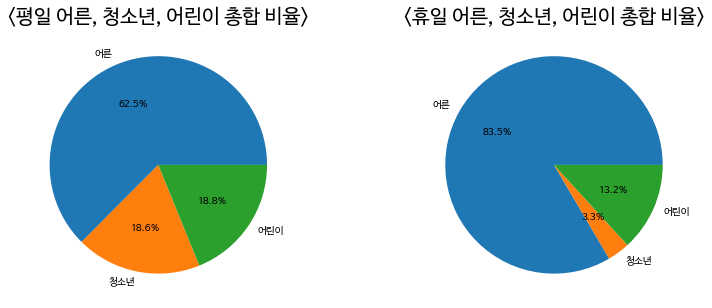

In [ ]:
# 평일 -> 어른, 청소년, 어린이 비중
# 휴일 -> 어른, 청소년, 어린이 비중
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
ratio = [np.sum(ad_work), np.sum(st_work), np.sum(ch_work)]
labels = ['어른', '청소년', '어린이']
plt.title('<평일 어른, 청소년, 어린이 총합 비율>',fontsize = 20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')

plt.subplot(1,2,2)
ratio = [np.sum(ad_holi), np.sum(st_holi), np.sum(ch_holi)]
labels = ['어른', '청소년', '어린이']
plt.title('<휴일 어른, 청소년, 어린이 총합 비율>',fontsize = 20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')


plt.show()


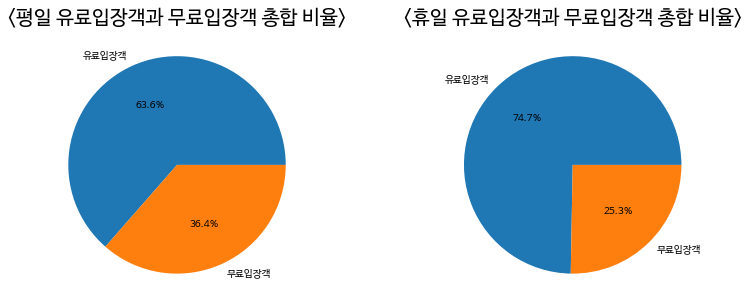

In [ ]:
# 평일 -> 유료, 무료
# 휴일 -> 유료, 무료



charge_work = []
free_work = []

charge_holi = []
free_holi = []




for i in range(0,3616):

  if holiday.loc[i]['휴일유무'] == 0 :
    
    charge_work.append(holiday.loc[i]['유료입장객'])  #유료입장객
    free_work.append(holiday.loc[i]['무료입장객'])    #무료입장객


  elif holiday.loc[i]['휴일유무'] == 1 :  
    
    charge_holi.append(holiday.loc[i]['유료입장객'])  #유료입장객
    free_holi.append(holiday.loc[i]['무료입장객'])    #무료입장객




plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
ratio = [np.sum(charge_work), np.sum(free_work)]
labels = ['유료입장객', '무료입장객']
plt.title('<평일 유료입장객과 무료입장객 총합 비율>',fontsize = 20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')

plt.subplot(1,2,2)
ratio = [np.sum(charge_holi), np.sum(free_holi)]
labels = ['유료입장객', '무료입장객']
plt.title('<휴일 유료입장객과 무료입장객 총합 비율>',fontsize = 20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')


plt.show()




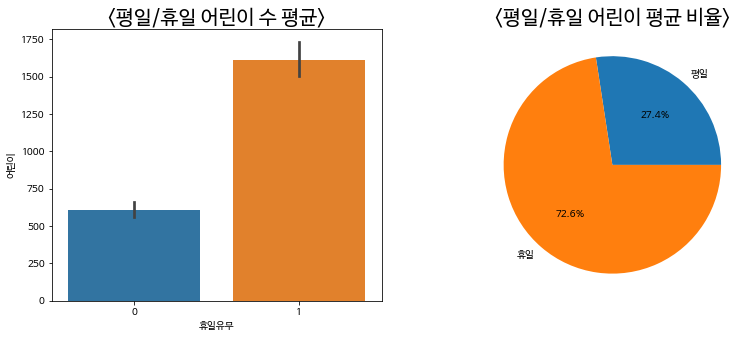

In [ ]:
#평일/휴일(휴일유무)에 따른 어린이 입장객수 평균



plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
plt.title('<평일/휴일 어린이 수 평균>',fontsize = 20)
sns.barplot(x = '휴일유무', 
            y = '어린이', 
            data = holiday)


plt.subplot(1,2,2)
ratio = [np.mean(ch_work), np.mean(ch_holi)]
labels = ['평일', '휴일']
plt.title('<평일/휴일 어린이 평균 비율>',fontsize = 20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')


plt.show()

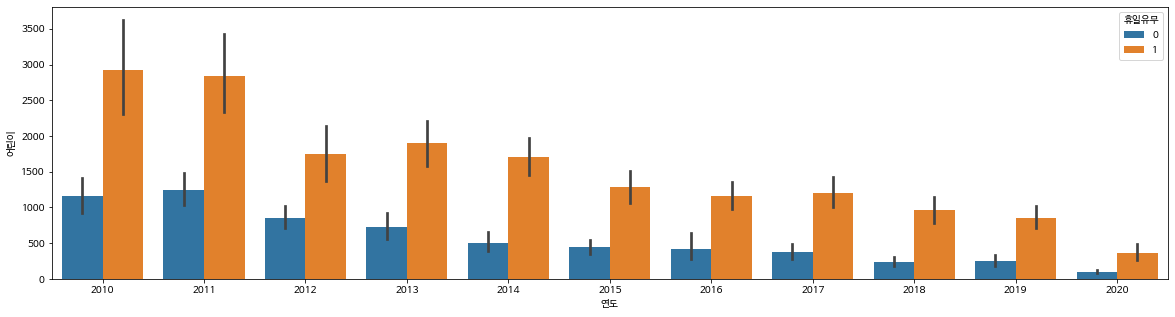

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x = '연도', 
            y = '어린이', 
            data = holiday,
            hue = '휴일유무')


plt.show()



In [ ]:
# 유료입장객에서만 어른,청소년,어린이 파악 가능!
#2 = 어른, 3 = 청소년, 4 = 어린이
child =  df['동,식물원4']+df['돌고래쇼4']+df['테마가든4']+df['캠프입장4']+df['자연학습4']+df['기타4'] #어린이 입장객 수 합치기
df_child = pd.DataFrame(child)

df_child = df_child.join(df['유료입장객'])
df_child = df_child.join(df['총합계'])
df_child.columns = ['어린이', '유료입장객', '총합계']
df_child

,어린이,유료입장객,총합계
0,1258,5110,5562
1,778,3790,4841
2,715,3715,4802
3,2,193,471
4,1797,3779,4210
...,...,...,...
3611,1137,9962,12018
3612,111,1405,2268
3613,194,1862,2980
3614,478,3271,4256


 - **피어슨 상관계수**

 두 변수 간에 선형성(linearity)이 얼마나 강한지를 측정
 
 1) 어린이 & 총합계

 2) 어린이 & 유료 입장객

 ----

어린이와 총합계 상관계수 :  0.7756674768971472
어린이와 유료 입장객 수 상관계수 :  0.801007012165949


Text(0.5, 1.0, '어린이에 따른 유료 입장객 수')

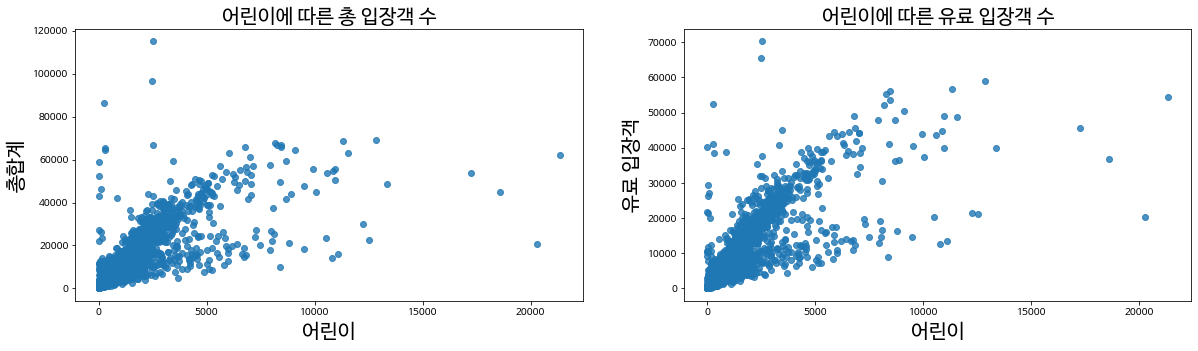

In [ ]:
# - 유료입장에서 어린이 & 전체 입장객수 상관계수
print('어린이와 총합계 상관계수 : ', stats.pearsonr(df_child['어린이'] , df_child['총합계'] )[0])
fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.xlabel('어린이', fontsize = 20)
plt.ylabel('총 입장객', fontsize = 20)
sns.regplot(x = '어린이', y = '총합계', data = df_child, fit_reg = False)
plt.title('어린이에 따른 총 입장객 수',fontsize = 20)



# - 유료입장에서 어린이 & 유료 입장객 수 상관계수
plt.subplot(1,2,2)
plt.xlabel('어린이', fontsize = 20)
print('어린이와 유료 입장객 수 상관계수 : ', stats.pearsonr(df_child['어린이'] , df_child['유료입장객'] )[0])
sns.regplot(x = '어린이', y = '유료입장객', data = df_child, fit_reg = False)
plt.ylabel('유료 입장객', fontsize = 20)
plt.title('어린이에 따른 유료 입장객 수',fontsize = 20)


([<matplotlib.patches.Wedge at 0x7f8f472e3410>,
 [Text(-0.863121062203806, 0.6819252392895968, '동,식물원'),
  Text(0.5116487470891496, -0.9737636056056437, '돌고래쇼'),
  Text(0.9585598884381245, -0.5395951633192151, '테마가든'),
  Text(1.0932183062835537, -0.12195792227862158, '캠프입장'),
  Text(1.099842886614383, -0.018590986088471786, '자연학습'),
  Text(1.0999999859003524, -0.00017612275375272304, '기타')],
 [Text(-0.4707933066566214, 0.3719592214306891, '78.7%'),
  Text(0.2790811347758998, -0.5311437848758056, '8.0%'),
  Text(0.522850848238977, -0.29432463453775365, '10.3%'),
  Text(0.5963008943364838, -0.0665225030610663, '2.5%'),
  Text(0.5999143017896633, -0.010140537866439155, '0.5%'),
  Text(0.5999999923092831, -9.606695659239438e-05, '0.0%')])

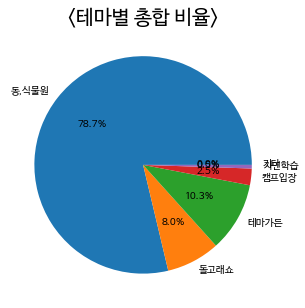

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
ratio = [np.sum(df['동,식물원8']), np.sum(df['돌고래쇼8']), np.sum(df['테마가든8']), np.sum(df['캠프입장8']), np.sum(df['자연학습8']), np.sum(df['기타8']) ]
labels = ['동,식물원', '돌고래쇼', '테마가든', '캠프입장', '자연학습', '기타']
plt.title('<테마별 총합 비율>',fontsize = 20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')




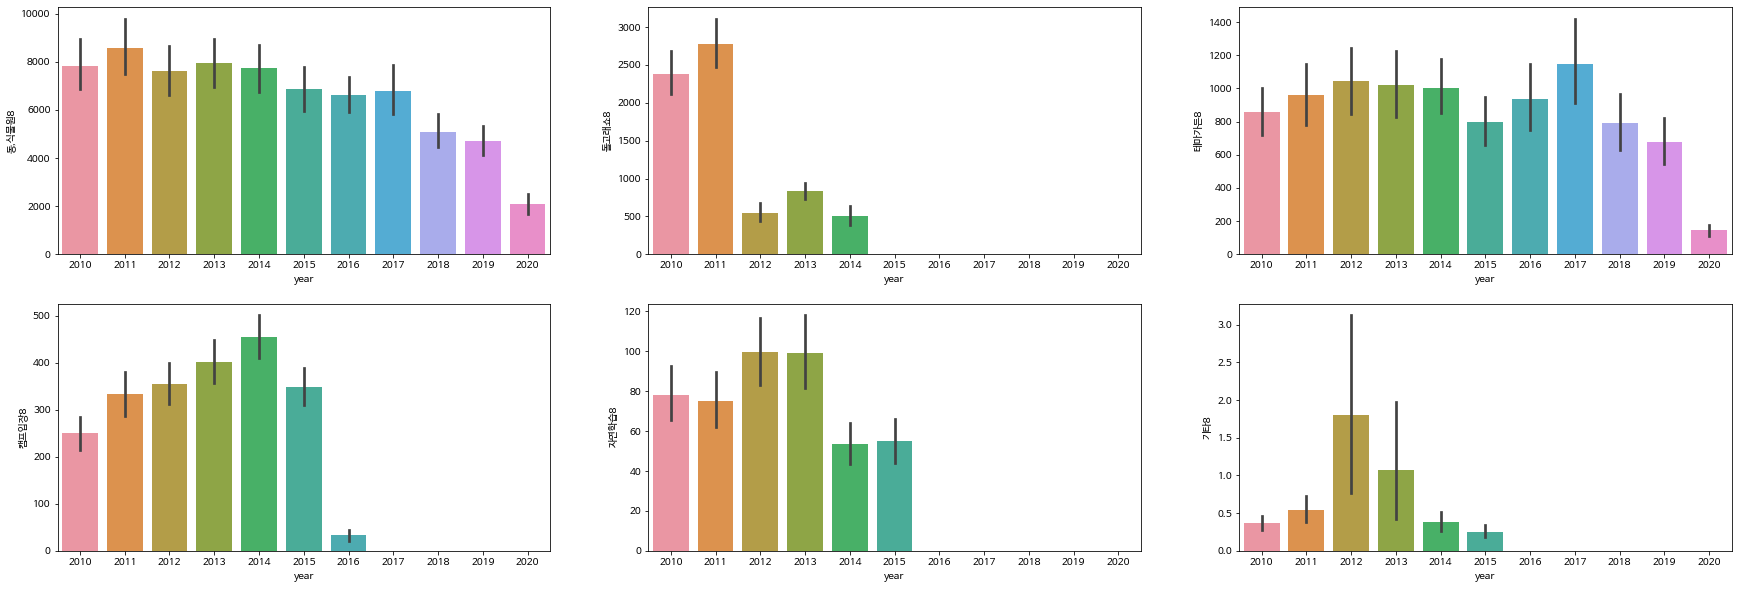

In [ ]:
plt.figure(figsize = (30,10))
#sns.set(font_scale = 1)
plt.subplot(2,3,1)
sns.barplot(x = 'year', 
            y = '동,식물원8', 
            data = df)

plt.subplot(2,3,2)
sns.barplot(x = 'year', 
            y = '돌고래쇼8', 
            data = df)

plt.subplot(2,3,3)
sns.barplot(x = 'year', 
            y = '테마가든8', 
            data = df)

plt.subplot(2,3,4)
sns.barplot(x = 'year', 
            y = '캠프입장8', 
            data = df)

plt.subplot(2,3,5)
sns.barplot(x = 'year', 
            y = '자연학습8', 
            data = df)

plt.subplot(2,3,6)
sns.barplot(x = 'year', 
            y = '기타8', 
            data = df)



plt.show()

# 쉬는날 / 안 쉬는날

In [ ]:
# 0 : 겨울 (12, 1, 2)
# 1 : 봄 (3, 4, 5)
# 2 : 여름 (6, 7, 8 )
# 3 : 가을 (9, 10, 11)



winter_ch = []
spring_ch = []
summer_ch  = []
fall_ch  = []

spring_dust = []  #봄 미세먼지
fall_dust = []    #가을 미세먼지

spring_dust_year = [] #봄 연도
fall_dust_year = [] #가을 연도

summer_rain = []

summer_rain_year = []  #여름 강수량



for i in range(0,3616):

  if df.loc[i]['계절'] == 0 : #겨울
    
    winter_ch.append(df.loc[i]['어린이'])  

  elif df.loc[i]['계절'] == 1 :  #봄
    
    spring_ch.append(df.loc[i]['어린이'])  
    spring_dust.append(df.loc[i]['미세먼지(㎍/㎥)'])
    spring_dust_year.append(df.loc[i]['year'])

  elif df.loc[i]['계절'] == 2 :  #여름
    
    summer_ch.append(df.loc[i]['어린이'])  
    summer_rain.append(df.loc[i]['강수량(mm)'])  
    summer_rain_year.append(df.loc[i]['year'])  

  elif df.loc[i]['계절'] == 3 :  #가을
    
    fall_ch.append(df.loc[i]['어린이'])  
    fall_dust.append(df.loc[i]['미세먼지(㎍/㎥)'])
    fall_dust_year.append(df.loc[i]['year'])

In [ ]:
spring_dust_df = pd.DataFrame(spring_dust)
spring_dust_df['spring child'] =  spring_ch
spring_dust_df['spring year'] =  spring_dust_year
spring_dust_df.columns = ['spring dust', 'spring child', 'spring year' ]

fall_dust_df = pd.DataFrame(fall_dust)
fall_dust_df['fall child'] = fall_ch
fall_dust_df['fall year'] = fall_dust_year
fall_dust_df.columns = ['fall dust', 'fall child', 'fall year' ]


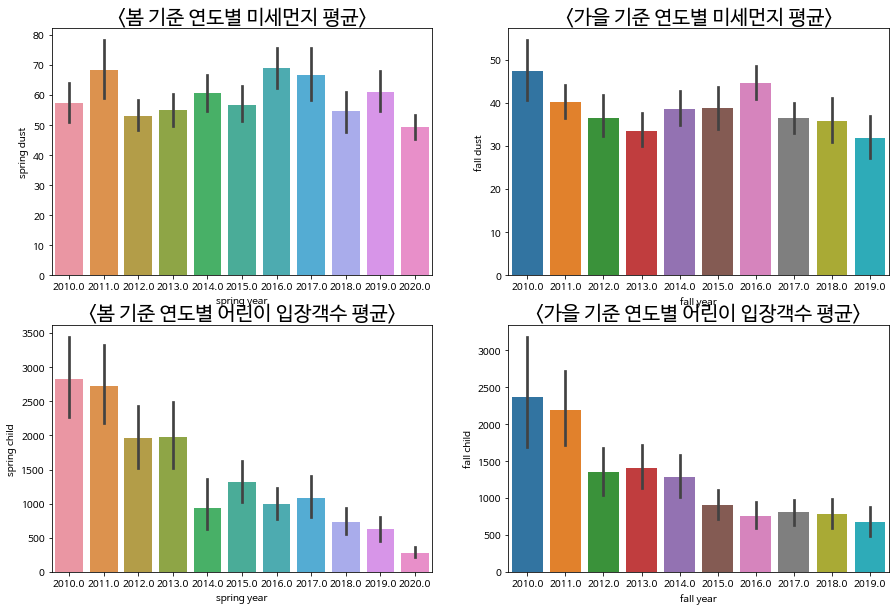

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title('<봄 기준 연도별 미세먼지 평균>',fontsize = 20)
sns.barplot(x = 'spring year', 
            y = 'spring dust', 
            data = spring_dust_df)

plt.subplot(2,2,2)
plt.title('<가을 기준 연도별 미세먼지 평균>',fontsize = 20)
sns.barplot(x = 'fall year', 
            y = 'fall dust', 
            data = fall_dust_df)

plt.subplot(2,2,3)
plt.title('<봄 기준 연도별 어린이 입장객수 평균>',fontsize = 20)
sns.barplot(x = 'spring year', 
            y = 'spring child', 
            data = spring_dust_df)

plt.subplot(2,2,4)
plt.title('<가을 기준 연도별 어린이 입장객수 평균>',fontsize = 20)
sns.barplot(x = 'fall year', 
            y = 'fall child', 
            data = fall_dust_df)

plt.show()

# 봄&가을 합치기

In [ ]:
summer_rain_df = pd.DataFrame(summer_rain)
summer_rain_df['summer_rain_child'] =  summer_ch
summer_rain_df['summer year'] =  summer_rain_year
summer_rain_df.columns = ['여름 강수량', '여름 어린이 입장객수', '여름 연도' ]
summer_rain_df

,여름 강수량,여름 어린이 입장객수,여름 연도
0,0.0,3606.0,2010.0
1,0.0,6564.0,2010.0
2,0.0,878.0,2010.0
3,0.0,1062.0,2010.0
4,0.0,1950.0,2010.0
...,...,...,...
915,20.0,73.0,2019.0
916,0.0,55.0,2019.0
917,36.9,1597.0,2019.0
918,0.2,52.0,2019.0


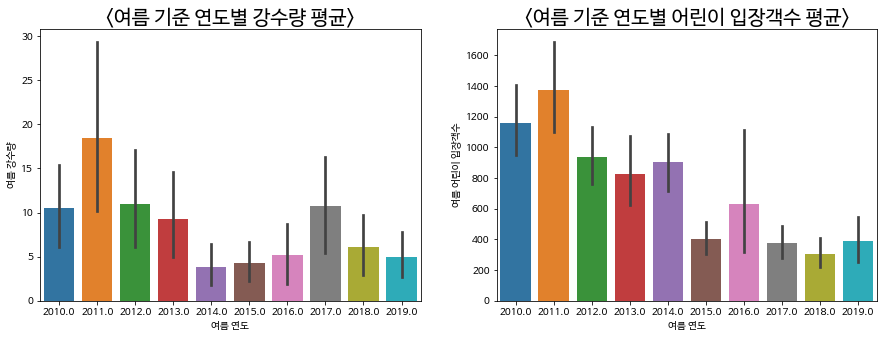

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('<여름 기준 연도별 강수량 평균>',fontsize = 20)
sns.barplot(x = '여름 연도', 
            y = '여름 강수량', 
            data = summer_rain_df)

plt.subplot(1,2,2)
plt.title('<여름 기준 연도별 어린이 입장객수 평균>',fontsize = 20)
sns.barplot(x = '여름 연도', 
            y = '여름 어린이 입장객수', 
            data = summer_rain_df)

plt.show()


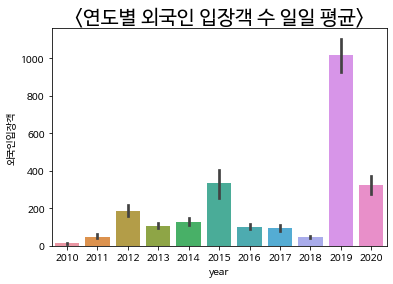

외국인 입장객이 최근에 크게 증가???? 데이터 이상


In [ ]:
sns.barplot(x = 'year', 
            y = '외국인입장객', 
            data = df)
plt.title('<연도별 외국인 입장객 수 일일 평균>',fontsize = 20)
plt.show()
print('외국인 입장객이 최근에 크게 증가???? 데이터 이상')